In [2]:
punlearn dmradar
plist dmradar



Parameters for /home/kjg/cxcds_param4/dmradar.par

        infile =                  Input image
       outfile =                  Output file name
           snr = 0                SNR limit
       xcenter = 0                X coordinate of center of grid (physical pixels)
       ycenter = 0                Y coordinate of center of grid (physical pixels)
       (method = 4)               Number of subimages required to be above SNR threshold
        (shape = pie)             Shape of region to use
       (rinner = 5)               Minimum inner radius (physical pixels)
       (router = 1000)            Outer radius range, (physical pixels)
       (astart = 0)               Starting angle, degrees CCW +X axis
       (arange = 360)             Range of angles, degrees CCW from astart
  (ellipticity = 1)               Ellipticity of shape (1=circle,0=line)
       (rotang = 0)               Rotation angle of shape
    (minradius = 0.5)             Minimum allowed radius (phys pixels)
   

In [3]:
dmstat abell665.flux.asm cen+ sig- med- verb=0 
pdump dmstat | grep cntrd

out_cntrd_log='720.08042887,679.07468657'
out_cntrd_phys='4095.6608577,4207.6493731'
out_sigma_cntrd=''


In [4]:
px=`stk_read_num ")dmstat.out_cntrd_phys" 1 echo+`
py=`stk_read_num ")dmstat.out_cntrd_phys" 2 echo+`

echo $px $py

4095.6608577 4207.6493731


In [7]:
dmradar \
  infile=abell665.flux.asm \
  inerr=dmnautilus/abell665.flux_err.asm \
  outfile=radar.img \
  x=4011.5 y=4029.5 \
  snr=10 \
  rinner=20 router=2020 \
  astart=75 \
  ellipticity=0.6 \
  minrad=5 minangle=10 \
  shape=epanda \
  method=0 \
  outmask=radar.map \
  mode=h clob+
  

In [8]:
dmimggrad radar.map radar.grad sobel mag clob+

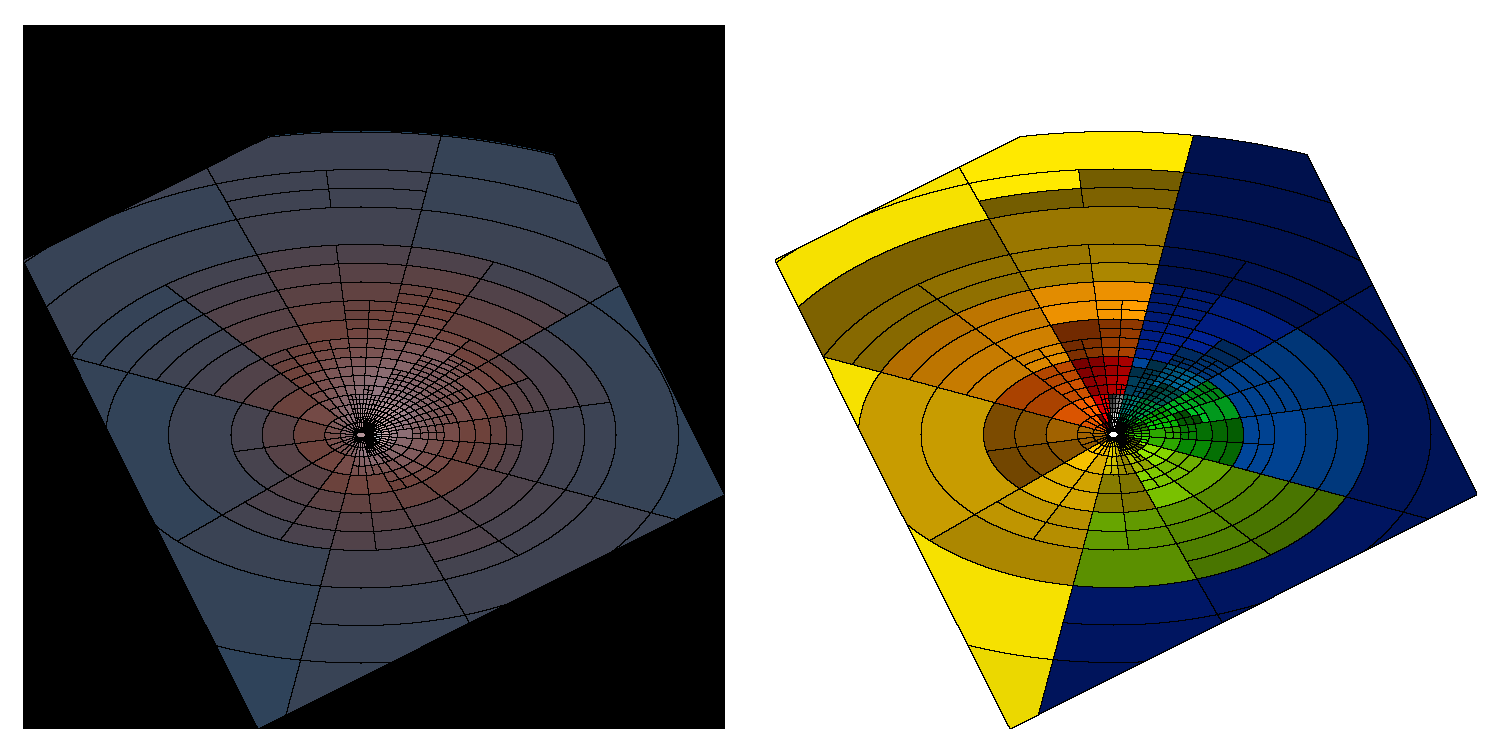

In [9]:
ds9 -geometry 1500x800 radar.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    -mask color black -mask radar.grad -nomask \
    radar.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask radar.grad -nomask \
    -regions select all -regions delete all \
    -saveimage png radar.png -exit

display < radar.png

In [10]:
ds9 abell665_fill.img